<a href="https://colab.research.google.com/github/louismathewbt23/Bioinformatics/blob/main/Expt_9_Functional_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install biopython requests networkx matplotlib graphviz

In [ ]:
from google.colab import files
files.upload()

Saving EBIFASTAoutput.out to EBIFASTAoutput.out


{'EBIFASTAoutput.out': b'# /fasta/bin/fasta36 -l /nfs/public/ro/es_codon/newdata/prod/fastacfg/fasta3db -L -T 32 -p -s BL50 -f -10 -g -2 -E "10.0 -1.0" -F 0.0 -b 50 -d 50 -m "F9B fasta-I20251230-050534-0069-47746874-p1m.m9" -m "F10 fasta-I20251230-050534-0069-47746874-p1m.m10" -z 1 @:1- +uniprotkb_swissprot+ 2\nFASTA searches a protein or DNA sequence data bank\n version 36.3.8h May, 2020\nPlease cite:\n W.R. Pearson & D.J. Lipman PNAS (1988) 85:2444-2448\n\nQuery: @\n  1>>>EMBOSS_001 - 770 aa\nLibrary: UniProtKB\n  207922125 residues in 573661 sequences\n\nStatistics:  Expectation_n fit: rho(ln(x))= 9.8388+/-0.000149; mu= 2.0167+/- 0.008\n mean_var=137.6035+/-25.911, 0\'s: 389 Z-trim(115.3): 819  B-trim: 1100 in 1/67\n Lambda= 0.109335\n statistics sampled from 60000 (61957) to 73600 sequences\nAlgorithm: FASTA (3.8 Nov 2011) [optimized]\nParameters: BL50 matrix (15:-5), open/ext: -10/-2\n ktup: 2, E-join: 1 (0.402), E-opt: 0.2 (0.129), width:  16\n Scan time: 12.220\n\nThe best score

In [ ]:
from Bio import SeqIO
import requests
import networkx as nx
import matplotlib.pyplot as plt

# Step 1: Read sequences from your OUT file (FASTA format)
filename = "EBIFASTAoutput.out"   # replace with your actual file
sequences = list(SeqIO.parse(filename, "fasta"))

print(f"Loaded {len(sequences)} sequences")

Loaded 50 sequences


/usr/local/lib/python3.12/dist-packages/Bio/SeqIO/FastaIO.py:202: BiopythonDeprecationWarning: Previously, the FASTA parser silently ignored comments at the beginning of the FASTA file (before the first sequence).

Nowadays, the FASTA file format is usually understood not to have any such comments, and most software packages do not allow them. Therefore, the use of comments at the beginning of a FASTA file is now deprecated in Biopython.

In a future Biopython release, this deprecation warning will be replaced by a ValueError. To avoid this, there are three options:

(1) Modify your FASTA file to remove such comments at the beginning of the file.

(2) Use SeqIO.parse with the 'fasta-pearson' format instead of 'fasta'. This format is consistent with the FASTA format defined by William Pearson's FASTA aligner software. This format allows for comments before the first sequence; lines starting with the ';' character anywhere in the file are also regarded as comment lines and are ignored.



Picking one protein from the Fast Alignment output, fetch pathway data from UniProt pointing to KEGG and Reactome pathways and visualize

Protein: Amyloid-beta precursor protein
Function: ['Functions as a cell surface receptor and performs physiological functions on the surface of neurons relevant to neurite growth, neuronal adhesion and axonogenesis. Interaction between APP molecules on neighboring cells promotes synaptogenesis (PubMed:25122912). Involved in cell mobility and transcription regulation through protein-protein interactions. Can promote transcription activation through binding to APBB1-KAT5 and inhibits Notch signaling through interaction with Numb. Couples to apoptosis-inducing pathways such as those mediated by G(o) and JIP. Inhibits G(o) alpha ATPase activity (By similarity). Acts as a kinesin I membrane receptor, mediating the axonal transport of beta-secretase and presenilin 1 (By similarity). By acting as a kinesin I membrane receptor, plays a role in axonal anterograde transport of cargo towards synapses in axons (PubMed:17062754, PubMed:23011729). Involved in copper homeostasis/oxidative stress thro

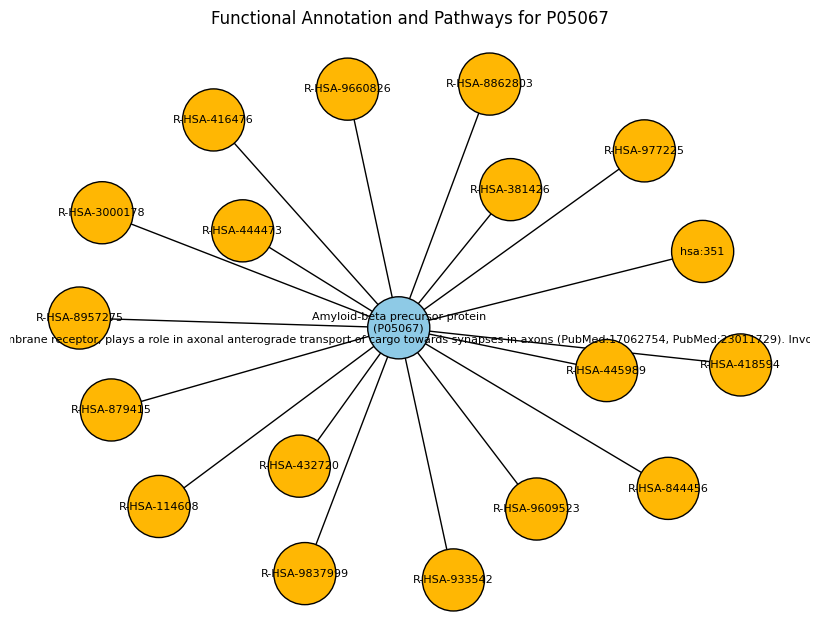

In [ ]:
import requests
import networkx as nx
import matplotlib.pyplot as plt

accession = "P05067"  # UniProt accession
url = f"https://rest.uniprot.org/uniprotkb/{accession}.json"

response = requests.get(url)
if response.status_code == 200:
    data = response.json()

    # Extract protein name
    protein_name = data.get("proteinDescription", {}).get("recommendedName", {}).get("fullName", {}).get("value")

    # Extract function annotation
    comments = data.get("comments", [])
    functions = [c["texts"][0]["value"] for c in comments if c["commentType"] == "FUNCTION"]

    # Extract pathways (Reactome/KEGG cross-references)
    xrefs = data.get("uniProtKBCrossReferences", [])
    pathways = [x["id"] for x in xrefs if x["database"] in ["Reactome", "KEGG"]]

    print("Protein:", protein_name)
    print("Function:", functions)
    print("Pathways:", pathways)

    # Step 2: Build graph
    G = nx.Graph()

    # Add protein node
    protein_label = f"{protein_name}\n({accession})"
    if functions:
        protein_label += f"\nFunction: {functions[0]}"
    G.add_node("Protein", label=protein_label, color="#8ecae6")

    # Add pathway nodes
    for p in pathways:
        G.add_node(p, label=p, color="#ffb703")
        G.add_edge("Protein", p)

    # Step 3: Draw graph
    plt.figure(figsize=(8,6))
    pos = nx.spring_layout(G, seed=42)

    node_colors = [d["color"] for _, d in G.nodes(data=True)]
    labels = {n: d["label"] for n, d in G.nodes(data=True)}

    nx.draw(G, pos, with_labels=False, node_color=node_colors, node_size=2000, edgecolors="black")
    nx.draw_networkx_labels(G, pos, labels, font_size=8)

    plt.title(f"Functional Annotation and Pathways for {accession}")
    plt.axis("off")
    plt.show()
else:
    print("Error fetching UniProt data:", response.status_code)

